In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\Automobile_insurance_fraud.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
data.shape

(1000, 40)

In [6]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

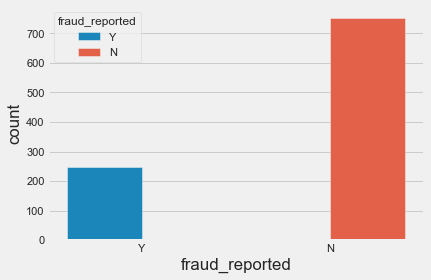

In [7]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [8]:
#So there are 247 cases reported as fraud in the above dataset

In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
#_c39 has all null values, so we will drop that column
data = data.drop(columns = ['_c39'])
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


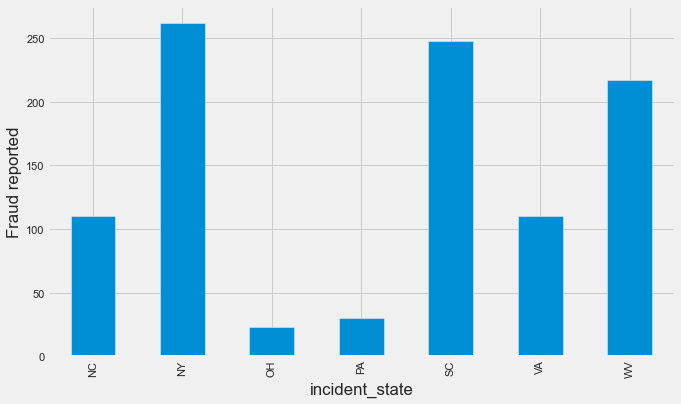

In [11]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = data.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

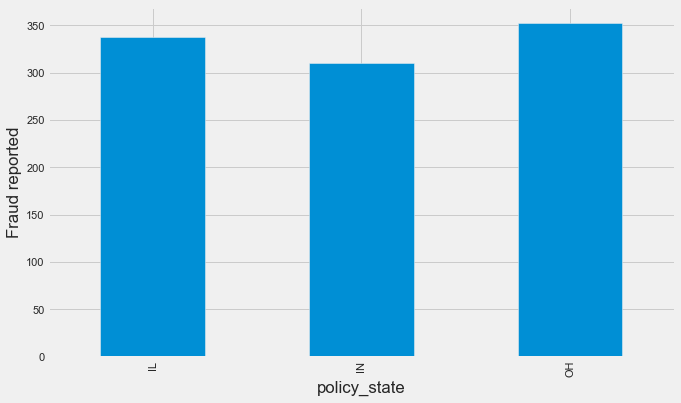

In [12]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = data.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

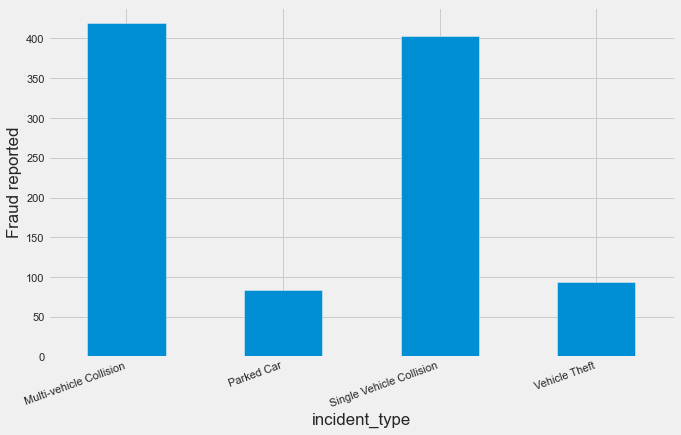

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = data.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

In [15]:
# Cleaning up the model for model training. Lets convert the label into numerical
data['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
data['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

In [16]:
#Lets drop unwanted columns from the dataset. First lets check how many unique characters are there in each column
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [17]:
#If the unique values are high, the data training the model is not necessary. So we will drop those columns.
data = data.drop(columns = ['policy_number','policy_bind_date','insured_zip','incident_location'])
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [18]:
#Handle Categorical Data
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

In [19]:
#One-hot encoding all categorical columns except output column since it is already converted
list_hot_encoded = []
for column in data.columns:
    if(data[column].dtypes==object and column != 'fraud_reported'):
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        list_hot_encoded.append(column)
#Drop hot-encoded columns
data = data.drop(list_hot_encoded, axis=1)

In [20]:
data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,0,0,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,0,0,0,0,0,0,0,0,0,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,0,0,0,0,0,0,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.dtypes

months_as_customer         int64
age                        int64
policy_deductable          int64
policy_annual_premium    float64
umbrella_limit             int64
                          ...   
auto_model_Tahoe           uint8
auto_model_Ultima          uint8
auto_model_Wrangler        uint8
auto_model_X5              uint8
auto_model_X6              uint8
Length: 222, dtype: object

In [ ]:
#Lets start training the model

In [22]:
X = data.drop(columns=['fraud_reported'])
y = data['fraud_reported']

In [23]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [25]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Lets see how well our model performs on the test dataset

In [26]:
y_pred = log_reg.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.792

# Confusion matrix

In [28]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[161,  21],
       [ 31,  37]], dtype=int64)

In [29]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [30]:
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.792

In [31]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8846153846153846

In [32]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8385416666666666

In [33]:
#F1 score
F1_score = 2*(Recall*Precision)/(Recall+Precision)
F1_score

0.8609625668449198

In [34]:
#Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.714366515837104

# KNN model

In [35]:
#Lets fit the data into Knn model and see how well it performs
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(x_test)

In [37]:
knn.score(x_train,y_train)

0.8013333333333333

In [38]:
print("The accuracy score is : ",accuracy_score(y_test,y_pred))

The accuracy score is :  0.7


In [ ]:
#lets try to increase accuracy by using hyperparameter tuning

In [39]:
param_grid = {'algorithm' : ['ball_tree','kd_tree','brute'],
              'leaf_size' : [18,20,25,27,30,32,34],
              'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [40]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [45]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.653, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.700, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.733, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.747, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.700, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.680, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.727, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.753, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.720, total= 

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   51.2s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [46]:
#Lets see the best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 12}

In [47]:
#we will use these parameters in our knn algorithm and check if accuracy is increasing
knn = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 18, n_neighbors = 12)

In [48]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)

In [49]:
knn.score(x_train,y_train)

0.7653333333333333

In [50]:
knn.score(x_test,y_test)

0.728

# We have a lesser score in KNN model

# random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rand_clf = RandomForestClassifier(random_state=41)

In [53]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=41)

In [54]:
rand_clf.score(x_test,y_test)

0.748

In [ ]:
#hyper parameter tuning to improve the score

In [55]:
grid_param = {'n_estimators' : [90,100,115,130],
              'criterion' : ['gini','entropy'],
              'min_samples_leaf' : range(1,10,1),
              'min_samples_split' : range(2,10,1),
              'max_features' : ['auto','log2']
              }

In [56]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose = 3)

In [57]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 15.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=41), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [58]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

In [59]:
rand_clf = RandomForestClassifier(criterion='gini',
                                 max_features = 'auto',
                                 min_samples_leaf= 1,
                                 min_samples_split=2,
                                 n_estimators= 130, random_state=41)

In [60]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=130, random_state=41)

In [61]:
rand_clf.score(x_test,y_test)

0.736

# So the best model we have built is of logistic regression only. So we will save that model

In [62]:
import pickle
fraud_detection = 'finalized_model.pickle'
pickle.dump(log_reg,open(fraud_detection,'wb'))

# Saved the model